# Introdução

A Doença Renal Crônica (DRC) é uma condição médica progressiva caracterizada pela deterioração gradual da função renal ao longo do tempo. Quando não diagnosticada ou tratada precocemente, pode levar a complicações graves, incluindo insuficiência renal terminal. O diagnóstico precoce da DRC é fundamental para a adoção de intervenções terapêuticas que podem retardar sua progressão e melhorar a qualidade de vida dos pacientes.

Com o avanço das tecnologias de análise de dados e aprendizado de máquina, tornou-se possível utilizar grandes volumes de dados clínicos para prever a presença de doenças de forma automatizada e eficiente. Nesse contexto, o dataset apresentado é uma valiosa ferramenta para o desenvolvimento de modelos preditivos voltados à identificação da DRC.


Para fazer essa análise usaremos um [conjunto de dados](https://www.kaggle.com/datasets/mansoordaku/ckdisease) do Kagle que possui informações sobre 400 pacientes que foram monitorados em um período de dois meses em um hospital na Índia. Para mais detalhes o mesmo dataset pode ser encontrado [aqui](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease). Ele inclui 24 atributos (ou *features*) que descrevem o estado de saúde dos indivíduos, além de uma variável-alvo (*class*) que indica a presença ou ausência da doença renal crônica.

Abaixo, são descritas as principais variáveis do dataset:

**Variáveis Numéricas:**

* **age**: Idade do paciente em anos.
* **bp**: Pressão arterial em mm/Hg.
* **bgr**: Glicose sanguínea aleatória (mg/dl).
* **bu**: Ureia no sangue (mg/dl).
* **sc**: Creatinina sérica (mg/dl).
* **sod**: Sódio (mEq/L).
* **pot**: Potássio (mEq/L).
* **hemo**: Hemoglobina (g/dl).
* **pcv**: Volume de células compactadas.
* **wc**: Contagem de leucócitos (células/cumm).
* **rc**: Contagem de eritrócitos (milhões/cmm).

**Variáveis Nominais:**

* **sg**: Gravidade específica da urina (valores como 1.005 a 1.025).
* **al**: Albumina (níveis de 0 a 5).
* **su**: Açúcar (níveis de 0 a 5).
* **rbc**: Células vermelhas do sangue (normal ou anormal).
* **pc**: Células de pus (normal ou anormal).
* **pcc**: Grumos de células de pus (presente ou ausente).
* **ba**: Presença de bactérias (presente ou ausente).
* **htn**: Hipertensão (sim ou não).
* **dm**: Diabetes mellitus (sim ou não).
* **cad**: Doença arterial coronariana (sim ou não).
* **appet**: Apetite (bom ou ruim).
* **pe**: Edema periférico (sim ou não).
* **ane**: Anemia (sim ou não).

**Variável Alvo:**

* **class**: Indica se o paciente tem doença renal crônica (*ckd*) ou não (*notckd*).

# Objetivos

O principal objetivo deste trabalho foi desenvolver um modelo preditivo capaz de classificar o estado de saúde de pacientes com base na variável-alvo *class*, que indica a presença (*ckd*) ou ausência (*notckd*) de Doença Renal Crônica (DRC). A partir das informações clínicas e laboratoriais presentes no conjunto de dados, buscou-se identificar padrões que permitissem a detecção automatizada da condição de saúde do paciente. Além disso, o trabalho também teve como objetivos secundários:

* Avaliar a eficácia de diferentes algoritmos de aprendizado de máquina na tarefa de classificação.
* Identificar possíveis inconsistências ou falhas nos dados, como vazamento de informações (*data leakage*) ou a presença de dados sintéticos ou falsos.
* Discutir os impactos da qualidade dos dados sobre o desempenho dos modelos preditivos.




# **Metodologia**

A metodologia adotada neste estudo seguiu uma abordagem em três etapas principais: **pré-processamento dos dados**, **aplicação de algoritmos de aprendizado de máquina** e **análise dos resultados obtidos**.

1. **Pré-processamento dos Dados**

   Inicialmente, os dados brutos foram submetidos a um processo de limpeza e preparação. Essa etapa incluiu:

   * Tratamento de valores ausentes, seja por remoção de instâncias incompletas ou imputação de valores plausíveis.
   * Conversão de variáveis categóricas em representações numéricas, quando necessário, por meio de técnicas como codificação *one-hot* ou *label encoding*.
   * Normalização ou padronização de variáveis numéricas, com o intuito de equilibrar escalas distintas entre os atributos.
   * Verificação de outliers e inconsistências nos dados.

2. **Aplicação de Algoritmos de Aprendizado de Máquina**

   Com os dados preparados, foram aplicados dois algoritmos de aprendizado de máquina supervisionado para a tarefa de classificação:

   * SVM
   * Random Forest

   Os modelos foram treinados utilizando validação cruzada para garantir a generalização dos resultados, e avaliados com métricas apropriadas como acurácia, precisão, recall e F1-score.

3. **Análise dos Resultados e Investigação de Anomalias**

   Após a obtenção dos resultados, observou-se um desempenho incomumente alto em determinadas configurações de modelos. Essa constatação motivou uma investigação mais detalhada sobre a integridade do dataset, levantando suspeitas de possíveis problemas como:

   * **Vazamento de dados (data leakage)**: Informações do conjunto de teste ou que não estejam disponíveis fora do treino sendo usadas indevidamente durante esta etapa;
   * **Presença de dados sintéticos ou irreais**, que poderiam inflar artificialmente os resultados de classificação.

   Essa etapa foi fundamental para entender os limites do dataset e a confiabilidade dos modelos desenvolvidos.

## Importar dados do kagle




In [ ]:
# 1. Read the kaggle API token to interact with your kaggle account

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexsantosdeoliveira","key":"5d68bab511e74b57a5355d6d9d2def72"}'}

In [ ]:
#2. Series of commands to set-up for download

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 76 Jul 23 00:22 kaggle.json
/content


In [ ]:
#3. giving rw access (if 401-nathorized)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#4. Sanity check if able to access kaggle
!kaggle datasets list

ref                                                       title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sahilislam007/college-student-placement-factors-dataset   College Student Placement Factors Dataset               110450  2025-07-02 08:33:50.547000           5666        117  1.0              
abdulmalik1518/cars-datasets-2025                         Cars Datasets (2025)                                     25987  2025-07-17 21:43:28.493000           2286         53  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025   Electric Vehicle Specs Dataset (2025)🔋🚗                  16631  2025-06-20 07:14:56.777000           9984        243  1.0              
abhishekjaiswal4896/mental-hea

In [ ]:
#5. Download data command

!kaggle datasets download -d mansoordaku/ckdisease -p /content/drive/MyDrive/lungCancer

Dataset URL: https://www.kaggle.com/datasets/mansoordaku/ckdisease
License(s): unknown
  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 19.8MB/s]


In [ ]:
#6. unzip
!unzip /content/drive/MyDrive/lungCancer/ckdisease.zip -d /content/drive/MyDrive/lungCancer/ckdisease/

Archive:  /content/drive/MyDrive/lungCancer/ckdisease.zip
  inflating: /content/drive/MyDrive/lungCancer/ckdisease/kidney_disease.csv  


In [ ]:
! pip install scipy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import resample

In [ ]:
# Carrega diretamente o CSV
df = pd.read_csv("/content/drive/MyDrive/lungCancer/ckdisease/kidney_disease.csv")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## Pré processamento

As colunas ID e Classification foram removidas.
O pipeline de pré-processamento substitui os valores ausentes e NaNs das features numéricas. As colunas categóricas foram transformadas com OrdinalEncoder pois as categóricas que não são binárias (e.g genero) têm uma ordem associada (e.g 	specific gravity- sg).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas as pd

y = df['classification'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 1})
X = df.drop(columns=['classification', 'id'])

# transformando features numericas que estão com tipo object
object_numeric_features = ['pcv', 'wc', 'rc']
df[object_numeric_features] = df[object_numeric_features].apply(pd.to_numeric, errors='coerce')

colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline para variáveis numéricas: imputar média + scaler
pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para variáveis categóricas: imputar constante + encoding
pipeline_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessador = ColumnTransformer(transformers=[
    ('num', pipeline_numerico, colunas_numericas),
    ('cat', pipeline_categorico, colunas_categoricas)
])

X_train_transformado = preprocessador.fit_transform(X_train)
X_test_transformado = preprocessador.fit_transform(X_test)

colunas_transformadas = colunas_numericas + colunas_categoricas
X_train = pd.DataFrame(X_train_transformado, columns=colunas_transformadas, index=X_train.index)
X_test = pd.DataFrame(X_test_transformado, columns=colunas_transformadas, index=X_test.index)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 209 to 281
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     120 non-null    float64
 1   bp      120 non-null    float64
 2   sg      120 non-null    float64
 3   al      120 non-null    float64
 4   su      120 non-null    float64
 5   bgr     120 non-null    float64
 6   bu      120 non-null    float64
 7   sc      120 non-null    float64
 8   sod     120 non-null    float64
 9   pot     120 non-null    float64
 10  hemo    120 non-null    float64
 11  rbc     120 non-null    float64
 12  pc      120 non-null    float64
 13  pcc     120 non-null    float64
 14  ba      120 non-null    float64
 15  pcv     120 non-null    float64
 16  wc      120 non-null    float64
 17  rc      120 non-null    float64
 18  htn     120 non-null    float64
 19  dm      120 non-null    float64
 20  cad     120 non-null    float64
 21  appet   120 non-null    float64
 22  pe   

## Analisando dendograma

Utlizando um agrupamento hierárquico conseguimos ver que existem dois grupos bem separados, ckd e notckd talvez? Mas também é possível que hava alguma contaminação dos dados o que deixa o problema simples demais.

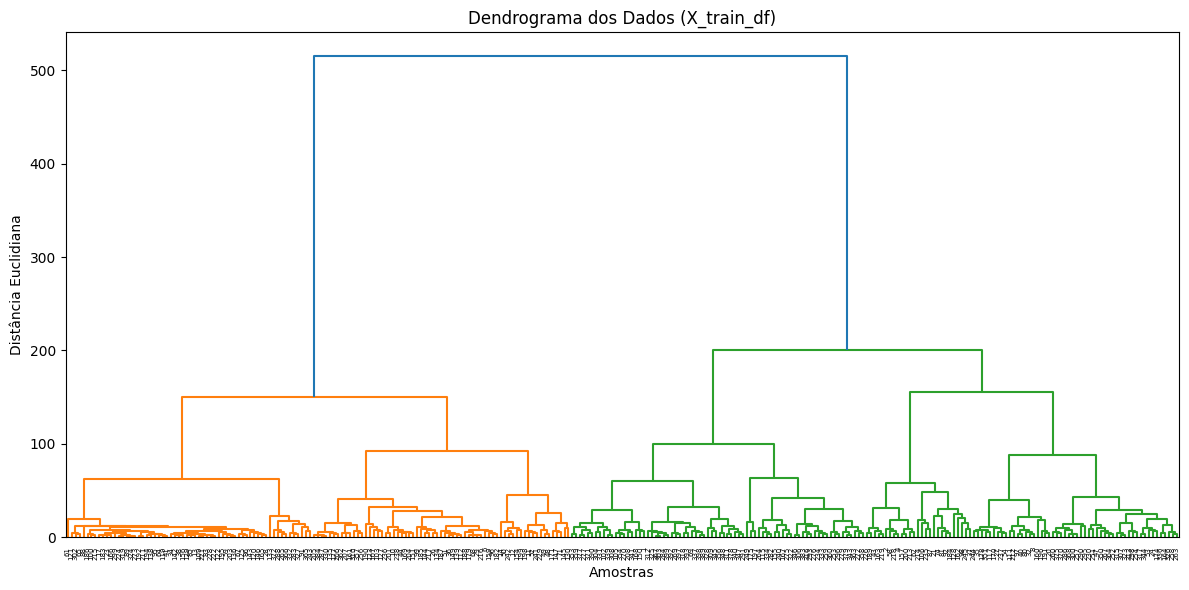

In [ ]:

# Calcula as ligações hierárquicas (linkage matrix)
Z = linkage(X_train, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=X_train.index, leaf_rotation=90)
plt.title('Dendrograma dos Dados (X_train_df)')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.tight_layout()
plt.show()

## SVM e Matriz de confusão

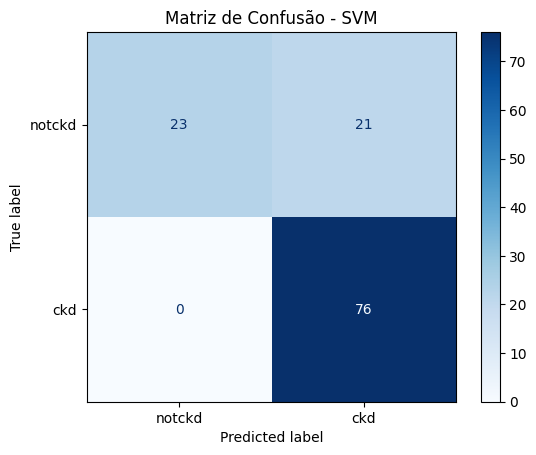

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_test_numpy = preprocessador.fit_transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train.values, y_train)
y_pred = svm_model.predict(X_test_numpy)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['notckd', 'ckd'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - SVM')
plt.show()

## Aplicando cross validate para coletar métricas mais confiáveis

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score


svm = SVC(kernel='rbf', C=1.0, gamma='scale')

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

X_test_transformado = preprocessador.transform(X_test)

scores = cross_val_score(svm, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Acurácias por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f}")

svm.fit(X_train.values, y_train)

y_pred = svm.predict(X_test_transformado)
test_acc = accuracy_score(y_test, y_pred)

test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')

print(f"\nMétricas no conjunto de teste:")
print(f"Acurácia: {test_acc:.4f}")
print(f"F1-score (macro): {test_f1:.4f}")
print(f"Recall (macro): {test_recall:.4f}")

Acurácias por fold: [0.89285714 0.92857143 0.85714286 0.89285714 0.82142857 0.92857143
 0.82142857 0.92857143 0.96428571 0.85714286]
Acurácia média: 0.8893

Métricas no conjunto de teste:
Acurácia: 0.8250
F1-score (macro): 0.7826
Recall (macro): 0.7614


## Aplicar um GRID Search CV para tentar melhorar o SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    svc,
    param_grid=param_grid,
    cv=10,
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall'},
    refit='accuracy',  #talvez retirar o refit
    return_train_score=True
)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10,
                                   100],
                         'kernel': ['linear', 'rbf']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall'})

### Análise dos resultados do SVM

In [ ]:
from sklearn.metrics import classification_report

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score (refit):", grid.best_score_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

Melhores parâmetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Melhor F1-score (refit): 0.9857142857142858
              precision    recall  f1-score   support

           0      1.000     0.932     0.965        44
           1      0.962     1.000     0.981        76

    accuracy                          0.975       120
   macro avg      0.981     0.966     0.973       120
weighted avg      0.976     0.975     0.975       120



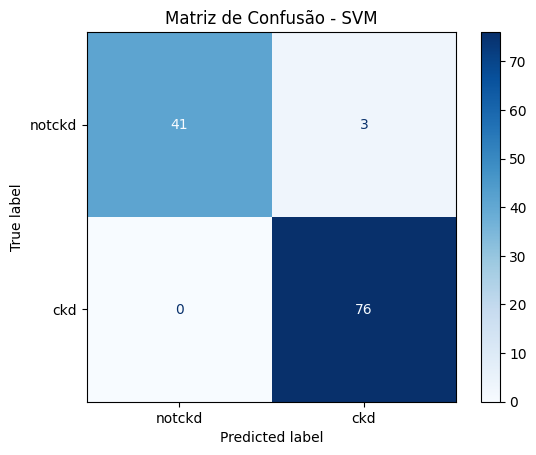

In [ ]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['notckd', 'ckd'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - SVM')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Acurácias por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f}")

rf.fit(X_train, y_train)

# Test on the transformed test set
y_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')

print(f"\nMétricas no conjunto de teste:")
print(f"Acurácia: {test_acc:.4f}")
print(f"F1-score (macro): {test_f1:.4f}")
print(f"Recall (macro): {test_recall:.4f}")

Acurácias por fold: [0.96428571 1.         1.         0.96428571 0.96428571 0.96428571
 1.         1.         0.89285714 0.96428571]
Acurácia média: 0.9714

Métricas no conjunto de teste:
Acurácia: 0.9833
F1-score (macro): 0.9819
Recall (macro): 0.9773


## Matriz de confusão do Random Forest

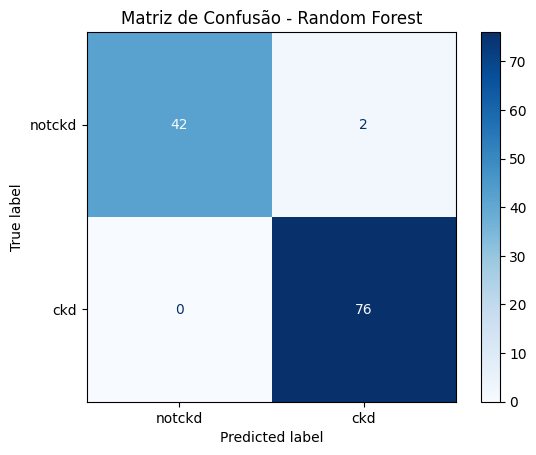

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['notckd', 'ckd'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

## Análise dos resultados

Desconfiamos da boa performance do classificador e verificamos a matriz de correlação abaixo. Algumas features tem uma alta correlação:

sg: Specific Gravity -> Uma nota abaixo de 1.007 sugere complicações renais.

hemo: Hemoglobina -> Pois doença no rins, pode levar para anemia que é caracterizada pela baixa quantidade de células vermelhas no sangue (rc) e consequentemente baixa quantidade de hemoglobina.

Isso também explica a alta correlação entre rc e hemo. Pois a hemoglobina está presento nas células vermelhas do sangue.

al: Tem uma correlação alta e positiva pois albumina é uma proteína encontrada no sangue. Se há uma alta quantidade de albumina na urina, isso é um forte indicativo de doenças renais (rins não filtrando direito o sangue).

hipertensão: é tanto causa como consequência de problemas nos rins, pois alta pressão arterial pode danificar os rins e rins danificados podem contribuir para uma alta pressão arterial.

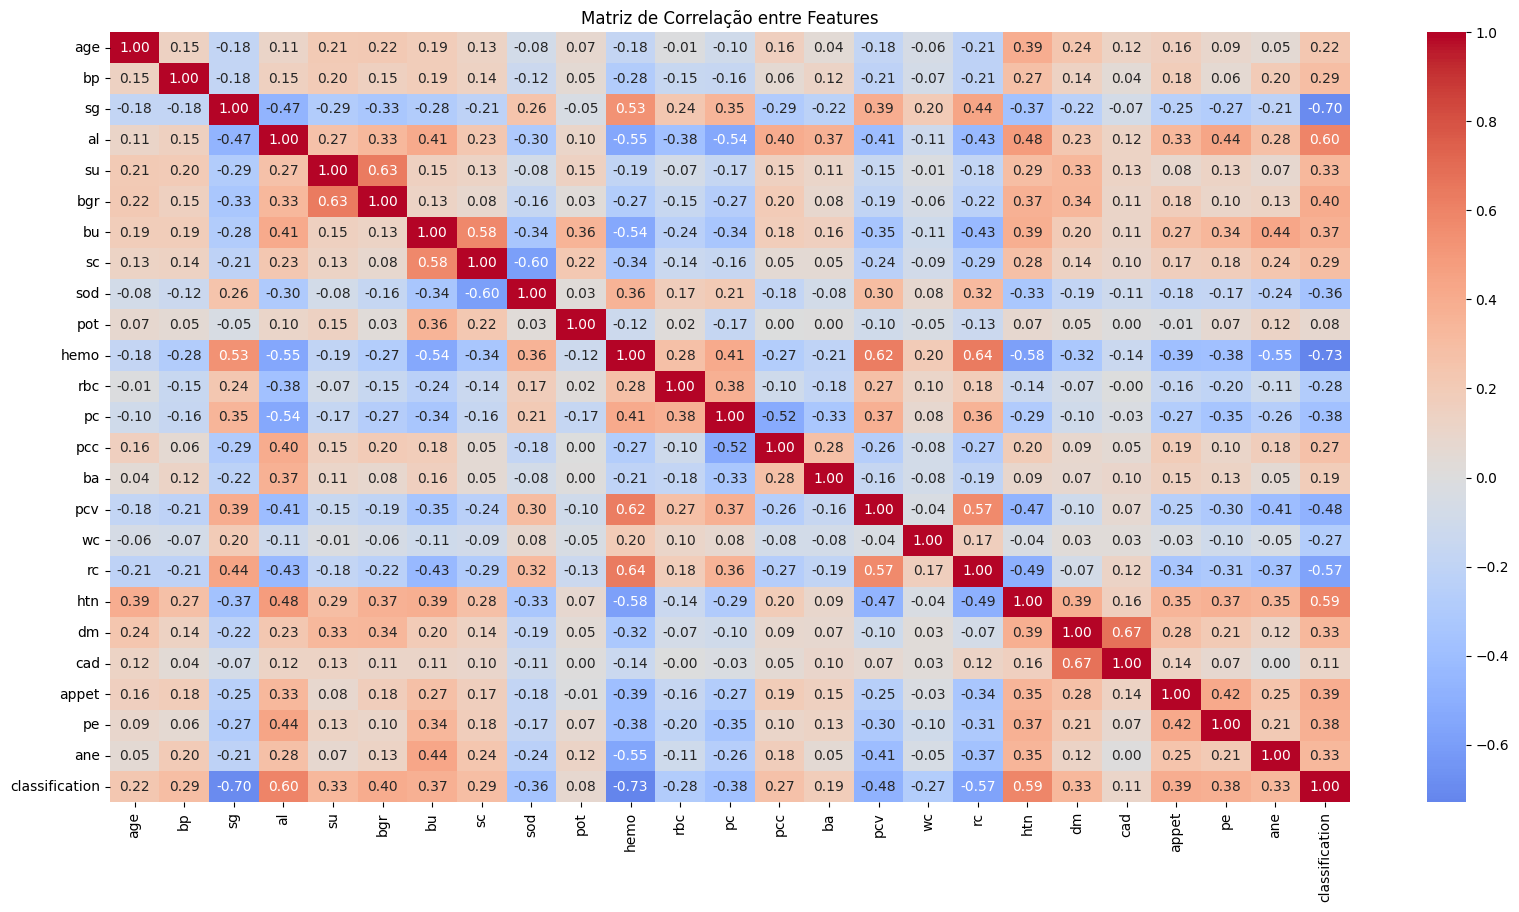

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar X_train e X_test
dados_completos_X = pd.concat([X_train, X_test], axis=0)

# Concatenar y_train e y_test
dados_completos_y = pd.concat([y_train, y_test], axis=0)

# Juntar features (X) e target (y) em um único DataFrame
dados_completos = pd.concat([dados_completos_X, dados_completos_y], axis=1)

# Calcular a matriz de correlação
corr = dados_completos.corr(numeric_only=True)

# Plotar
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Features')
plt.show()

In [ ]:
def plot_histograms(df: pd.DataFrame, feature: str = None, bins: int = 30):

    if feature:
        if feature not in df.columns:
            print(f"Coluna '{feature}' não encontrada no DataFrame.")
            return
        if not pd.api.types.is_numeric_dtype(df[feature]):
            print(f"A coluna '{feature}' não é numérica.")
            return

        plt.figure(figsize=(6, 4))
        df[feature].dropna().hist(bins=bins)
        plt.title(f'Histograma de {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        numeric_cols = df.select_dtypes(include=['number']).columns

        if len(numeric_cols) == 0:
            print("Não há colunas numéricas no DataFrame.")
            return

        n_cols = 2
        n_rows = (len(numeric_cols) + 1) // n_cols

        plt.figure(figsize=(n_cols * 6, n_rows * 4))

        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            df[col].dropna().hist(bins=bins)
            plt.title(f'{col}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.grid(True)

        plt.tight_layout()
        plt.show()

In [ ]:
df['age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

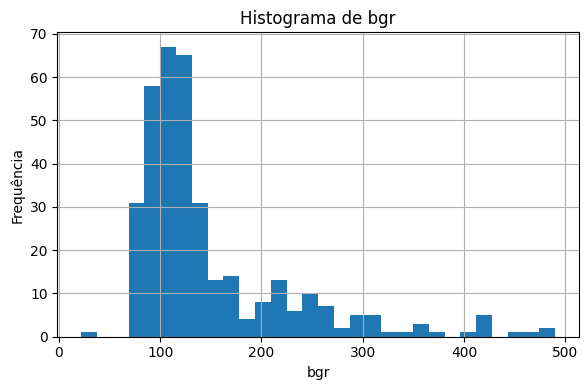

In [ ]:
plot_histograms(df, 'bgr')